In [1]:
import numpy as np
from intcode_computer import intcode_computer
from letters_and_numbers import characters

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
cpu = intcode_computer(11)

In [3]:
position = [0,0]
direction = [1,0]
hull = [[0,0,1]]

while cpu.get_complete() == False:
    in_list = np.where(np.logical_and(np.array(hull)[:,0] == position[0], np.array(hull)[:,1] == position[1]))[0]
    if len(in_list) > 0:
        inpt = hull[in_list[0]][2]
    else:
        inpt = 0
    
    #Get colour
    colour = cpu.run_program(inpt, pause_on_out=True, verbose=False)
    if len(colour) == 0:
           break   
    if len(in_list) > 0:
        hull[in_list[0]][2] = colour[0]
    else:
        hull.append([position[0], position[1], colour[0]])
    
    #Get turn
    turn = cpu.run_program(pause_on_out=True, verbose=False)
    if turn[0] == 0:
        #turn left 90
        if direction[0] == 1:
            direction[0] = 0
            direction[1] = -1
        elif direction[0] == -1:
            direction[0] = 0
            direction[1] = 1
        elif direction[1] == 1:
            direction[0] = 1
            direction[1] = 0
        elif direction[1] ==  -1:
            direction[0] = -1
            direction[1] = 0
        else:
            print('ERROR')
    elif turn[0] == 1:
        #turn right 90
        if direction[0] == 1:
            direction[0] = 0
            direction[1] = 1
        elif direction[0] == -1:
            direction[0] = 0
            direction[1] = -1
        elif direction[1] == 1:
            direction[0] = -1
            direction[1] = 0
        elif direction[1] ==  -1:
            direction[0] = 1
            direction[1] = 0
        else:
            print('ERROR')
            
    #Move
    position[0] += direction[0]
    position[1] += direction[1]
    
print('Part 1 Solution:', len(hull))

Part 1 Solution: 249


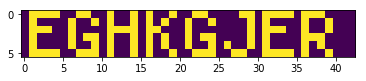

Part 2 Solution: EGHKGJER



In [4]:
hull = np.array(hull)

hull_x = abs(np.max(hull[:,0]) - np.min(hull[:,0]))+1
hull_y = abs(np.max(hull[:,1]) - np.min(hull[:,1]))+1

hull_img = np.zeros((hull_x, hull_y))
for i in range(0, len(hull)):
    x = 5 - (hull[i,0]+5)
    y = hull[i,1]
    hull_img[x,y] = hull[i,2]
    
plt.imshow(hull_img)
plt.show()

lan = characters()
rid = lan.find_characters(hull_img, x_offset=1)
print('Part 2 Solution:', rid)